In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('paper', font_scale=1.3)
red, blue, green, purple = sns.color_palette('Set1', 4)

# Result 2

In [80]:
b = 1.3
v = 1
TA = 0.4
ΔT = np.linspace(-0.4, 0.6, 1000)
TB = TA - ΔT
α = 0

In [81]:
γ1 = (b*v*α*TA + (TA - TB)) / (v * (1-TB))
γ2 = (b*v*α*TB + (1+b)*(TA - TB)) / (v * (1-TB) + (1-v) *(TA - TB))

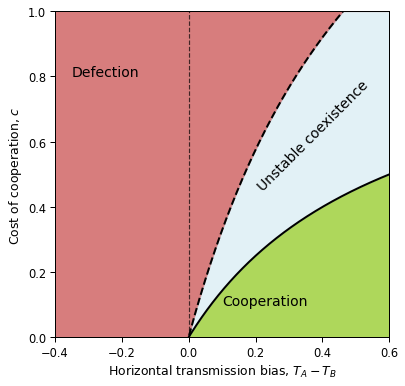

In [82]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(ΔT, γ1, '-k', lw=2)
ax.plot(ΔT, γ2, '--k', lw=2)
ax.axvline(0, color='k', ls='--', alpha=0.7)

pos = ΔT>0
ax.fill_between(ΔT[pos], 0, γ1[pos], color='yellowgreen', alpha=0.8)
ax.fill_between(ΔT[~pos], 0, γ2[~pos], color='yellowgreen', alpha=0.8)
ax.fill_between(ΔT[pos], γ2[pos], 1, color='indianred', alpha=0.8)
ax.fill_between(ΔT[~pos], γ1[~pos], 1, color='indianred', alpha=0.8)
ax.fill_between(ΔT[~pos], γ2[~pos], γ1[~pos], color='gold', alpha=0.5)
ax.fill_between(ΔT[pos], γ1[pos], γ2[pos], color='lightblue', alpha=0.35)

ax.set(xlim=(ΔT.min(), ΔT.max()), ylim=(0, 1), 
       xlabel='Horizontal transmission bias, $T_A - T_B$',
       ylabel='Cost of cooperation, $c$',
#        title='α={}'.format(α)
)

fontdict = dict(size=14)
if α == 0.7:
    ax.text(0.52, 0.75, r'$\gamma_1$', fontdict=fontdict)
    ax.text(0.38, 0.95, r'$\gamma_2$', fontdict=fontdict)
    ax.text(0.25, 0.1, r'Cooperation', fontdict=fontdict, rotation=0)
    ax.text(-0.32, 0.03, 'Stable coexistence', rotation=70)
    ax.text(0.12, 0.7, r'Unstable coexistence', fontdict=fontdict, rotation=25)
    ax.text(-0.35, 0.8, 'Defection', fontdict=fontdict, rotation=0)
if α == 0:
    ax.text(0.1, 0.1, r'Cooperation', fontdict=fontdict, rotation=0)
    # ax.text(-0.2, 0.02, r'*Stable coexistence', rotation=60)
    #ax.text(-0.1, 0.03, r'<-------Stable coexistence', rotation=90)
    ax.text(0.2, 0.45, r'Unstable coexistence', fontdict=fontdict, rotation=45)
    ax.text(-0.35, 0.8, 'Defection', fontdict=fontdict, rotation=0)
    
    
if α==0:
    fig.savefig('Figures/Result2_zero_alpha.pdf')
if α==0.7:
    fig.savefig('Figures/Result2__non_zero_alpha.pdf')

In [165]:
b = 1.3
c = 0.35
v = 1
T_A = 0.4
T_B = np.arange(0.1, 0.7, 0.001)
ΔT = T_A - T_B

In [166]:
a1 = (c*(1-T_B)-(1+b)*(T_A-T_B))/(b*T_B)
a2 = (c*(1-T_B)-(T_A-T_B))/(b*T_A)

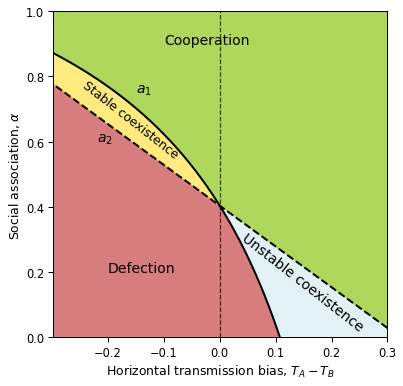

In [168]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(ΔT , 𝛿1, '-k', lw=2)
ax.plot(ΔT, 𝛿2, '--k', lw=2)
ax.axvline(0, color='k', ls='--', alpha=0.7)

pos = ΔT>0
ax.fill_between(ΔT[pos], 1, a2[pos], color='yellowgreen', alpha=0.8)
ax.fill_between(ΔT[~pos], 1, a1[~pos], color='yellowgreen', alpha=0.8)
ax.fill_between(ΔT[pos], a1[pos], color='indianred', alpha=0.8)
ax.fill_between(ΔT[~pos], a2[~pos], color='indianred', alpha=0.8)
ax.fill_between(ΔT[~pos], a2[~pos], a1[~pos], color='gold', alpha=0.5)
ax.fill_between(ΔT[pos], a1[pos], a2[pos], color='lightblue', alpha=0.35)

ax.text(-0.15, 0.75, r'$a_1$', fontdict=fontdict)
ax.text(-0.22, 0.6, r'$a_2$', fontdict=fontdict)
ax.text(-0.1, 0.9, r'Cooperation', fontdict=fontdict, rotation=0)
ax.text(-0.25, 0.55, 'Stable coexistence', rotation=-38)
ax.text(0.035, 0.02, r'Unstable coexistence', fontdict=fontdict, rotation=-38)
ax.text(-0.2, 0.2, 'Defection', fontdict=fontdict, rotation=0)

ax.set(xlim=(ΔT.min(), ΔT.max()), ylim=(0, 1), 
       xlabel='Horizontal transmission bias, $T_A - T_B$',
       ylabel=r'Social association, $\alpha$',
#        title='α={}'.format(α)
)
fig.savefig('Figures/Result2__alpha_on_y_axis.pdf')

In [62]:
c = np.linspace(0, 1, 1001).reshape((-1, 1))
ΔT = np.linspace(-0.4, 0.6, 1000)
pstar = (c * (1 - TB) - b * α * TA - (TA - TB)) / (b * (1 - α) * (TA - TB))
pstar = np.minimum(pstar, 1)
pstar = np.maximum(pstar, 0)

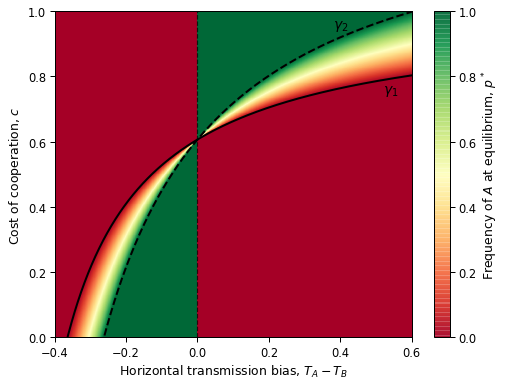

In [63]:
fig, ax = plt.subplots(figsize=(8, 6))
# cmaps: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
im = ax.pcolormesh(ΔT, c, pstar, cmap='RdYlGn', alpha=0.75, rasterized=True)
plt.colorbar(im, label='Frequency of $A$ at equilibrium, $p^*$', ax=ax)
ax.plot(ΔT, γ1, '-k', lw=2)
ax.plot(ΔT, γ2, '--k', lw=2)
ax.axvline(0, color='k', ls='--', alpha=0.7)
ax.set(xlim=(ΔT.min(), ΔT.max()), ylim=(0, 1), 
       xlabel='Horizontal transmission bias, $T_A - T_B$',
       ylabel='Cost of cooperation, $c$',
#        title='α={}'.format(α)
)

fontdict = dict(size=14)
if α == 0.7:
    ax.text(0.52, 0.75, r'$\gamma_1$', fontdict=fontdict)
    ax.text(0.38, 0.95, r'$\gamma_2$', fontdict=fontdict)

0.4924242424242424
0.4923076923076921


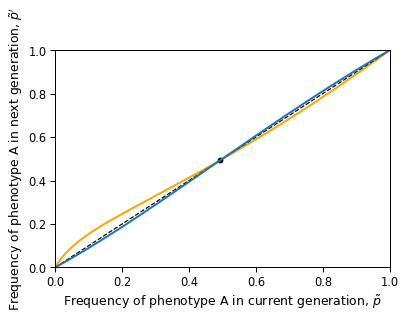

In [75]:
b=12
c = 0.35
T_A = 0.4
T_B = 0.9
α = 0.45

def p_parents_function(p):
    x1 = (p ** 2)*(1+b-c)*(1-(1-p)*(1-α)*T_B)
    x2 = p*(1-p)*(1-c)*(p*(1-α)*T_B+1-T_B)
    x3 = p*(1-p)*(1+b)*(p*(1-α)+α)*T_A
    x4 = ((1-p)**2)*p*(1-α)*T_A
    omega = 1+p*(b-c)
    p_parents = (x1+x2+x3+x4)/omega
    return p_parents

p_equilibrium = (c*(1-T_B)-α*b*T_A-(T_A-T_B))/(b*(1-α)*(T_A-T_B))
print(p_equilibrium)

p = np.arange(0, 1, 0.001)
p_tag = p_parents_function(p)

plt.plot(p, p_tag, color="orange", linewidth=2)
plt.plot(p, p, 'k--')
#plt.plot(β3/β1, β3/β1, "ko", label = r'$\tilde{p}^*$')
plt.xlabel(r'Frequency of phenotype A in current generation, $\tilde{p}$')
plt.ylabel(r"Frequency of phenotype A in next generation, $\tilde{p}'$")
plt.ylim(0, 1)
plt.xlim(0, 1)


b=1.3
c = 0.904
T_A = 0.5
T_B = 0.1
α = 0.4
p_equilibrium = (c*(1-T_B)-α*b*T_A-(T_A-T_B))/(b*(1-α)*(T_A-T_B))
print(p_equilibrium)
plt.plot(p_equilibrium, p_equilibrium, "ko", label = r'$\tilde{p}^*$')


p_tag = p_parents_function(p)
plt.plot(p, p_tag, linewidth = 2)
plt.savefig('Figures/coexistence_without_oblique.pdf')

# Result 3

In [38]:
TB = 0.7
TA = 0.5
b = 2
α = 0.7

In [39]:
vhat = (TB - TA) / (1 - TA)

In [40]:
v = np.linspace(0, 1, 1000)

In [41]:
γ1 = (b*v*α*TA + (TA - TB)) / (v * (1-TB))
γ1[np.isinf(γ1)] = -100
γ2 = (b*v*α*TB + (1+b)*(TA - TB)) / (v * (1-TB) + (1-v) *(TA - TB))

Text(0.5, 0.3, 'Stable coexistence')

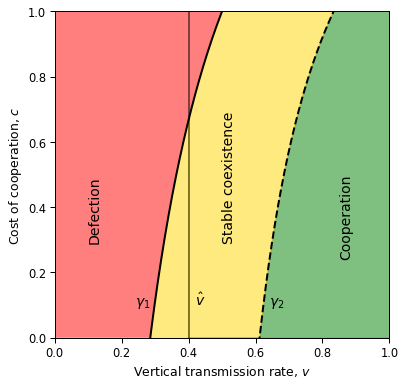

In [42]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(v, γ1, '-k', lw=2)
# γ2>1 when v<vhat for these parameter values
ax.plot(v[v>vhat], γ2[v>vhat], '--k', lw=2)
ax.axvline(vhat, ls='-', color='k', alpha=0.5, lw=2)

# iii.b v<vhat, γ2<c : irrelevant for these parameters.
ix = v<=vhat
ax.fill_between(v[ix], γ2[ix], 1, color='g', alpha=0.5)
# # iii.a, v>vhat, c<γ2
ix = v>vhat
ax.fill_between(v[ix], 0, γ2[ix], color='g', alpha=0.5)
# vi, γ1<c 
ax.fill_between(v, 1 ,γ1, color='r', alpha=0.5) 

# vii.a, v<vhat, c<γ2 and c<γ1
ix = v<=vhat
ax.fill_between(v[ix], np.minimum(γ1[ix], γ2[ix]), color='gold', alpha=0.5)
# # vii.b, v>vhat, γ2<c<γ1
ix = v>vhat
ax.fill_between(v[ix], γ2[ix], γ1[ix], color='gold', alpha=0.5)

ax.set(
    ylabel='Cost of cooperation, $c$',
    xlabel='Vertical transmission rate, $v$',
    ylim=(0, 1),
    xlim=(0, 1)
)

fontdict = dict(size=14)
ax.text(0.24, 0.1, r'$\gamma_1$', fontdict=fontdict)
ax.text(0.64, 0.1, r'$\gamma_2$', fontdict=fontdict)
ax.text(0.42, 0.1, r'$\hat v$', fontdict=fontdict)

ax.text(0.85, 0.25, r'Cooperation', fontdict=fontdict, rotation=90)
ax.text(0.1, 0.3, r'Defection', fontdict=fontdict, rotation=90)
ax.text(0.5, 0.3, r'Stable coexistence', fontdict=fontdict, rotation=90)

In [43]:
c = np.linspace(0, 1, 1001).reshape((-1, 1))
β1 = (c * (1-v) - b * (1-α*v)) * (TA - TB)
β3 = α * b * v * TA - c * v * (1-TB) +(TA-TB)

pstar = β3 / β1
pstar = np.minimum(pstar, 1)
pstar = np.maximum(pstar, 0)

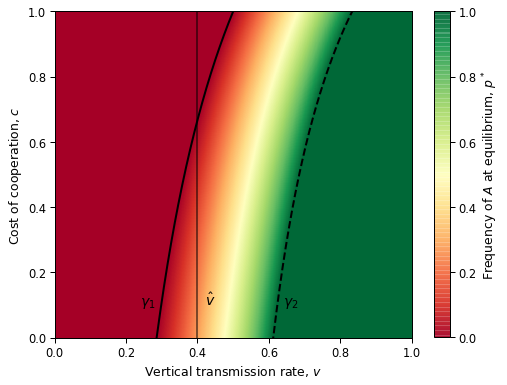

In [44]:
fig, ax = plt.subplots(figsize=(8, 6))
# cmaps: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
im = ax.pcolormesh(v, c, pstar, cmap='RdYlGn', alpha=0.75, rasterized=True)
plt.colorbar(im, label='Frequency of $A$ at equilibrium, $p^*$', ax=ax)
ax.plot(v, γ1, '-k', lw=2)
# γ2>1 when v<vhat for these parameter values
ax.plot(v[v>vhat], γ2[v>vhat], '--k', lw=2)
ax.axvline(vhat, ls='-', color='k', alpha=0.5, lw=2)
ax.set(
    ylabel='Cost of cooperation, $c$',
    xlabel='Vertical transmission rate, $v$',
    ylim=(0, 1),
    xlim=(0, 1)
)

fontdict = dict(size=14)
ax.text(0.24, 0.1, r'$\gamma_1$', fontdict=fontdict)
ax.text(0.64, 0.1, r'$\gamma_2$', fontdict=fontdict)
ax.text(0.42, 0.1, r'$\hat v$', fontdict=fontdict);